**자전거 대여량 예측 문제** (회귀)

* [seaborn 시각화 유용한 정리 사이트](https://hyemin-kim.github.io/2020/07/03/S-Python-Seaborn1/)


* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False


import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv', parse_dates = ['datetime'])
## parse_dates = 날짜/ 시간 데이터 형태에 맞게 파싱하기 
train.shape

(10886, 12)

### EDA 

In [ ]:
train.info() # 널값이 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
train.temp.describe() # 기온 

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

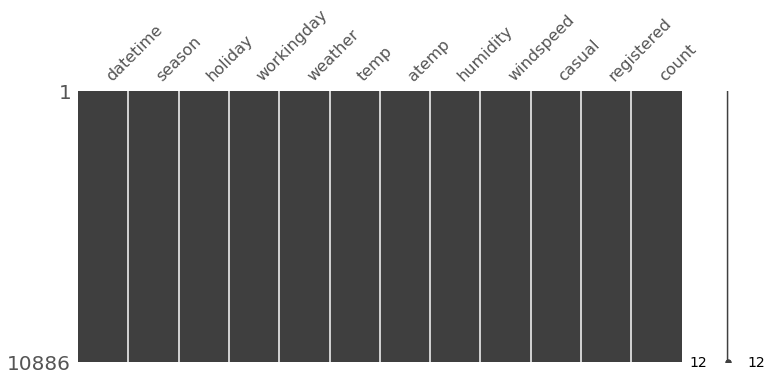

In [ ]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

[일자 및 시간 처리 방법](https://moondol-ai.tistory.com/180)

In [ ]:
train['year'] = train['datetime'].dt.year ## 파이썬 판다스 일자 및 시간 처리 방법 : dt. 
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [ ]:
train.groupby('year').mean()[['count']]

,count
year,
2011,144.223349
2012,238.560944


[seaborn 막대 그래프 : barplot](https://steadiness-193.tistory.com/185)

* barplot : 지정한 변수의 '평균' 을 계산하여 그린다. 데이터의 개수가 아니라 평균을 계산한다. 
* estimator 옵션에 np.sum 을 넘기면 데이터 개수의 합을 구할 수 있다. 

* 각 범주에 속하는 데이터의 개수를 막대 그래프로 그려내는 함수는 seaborn 의 ``countplot``

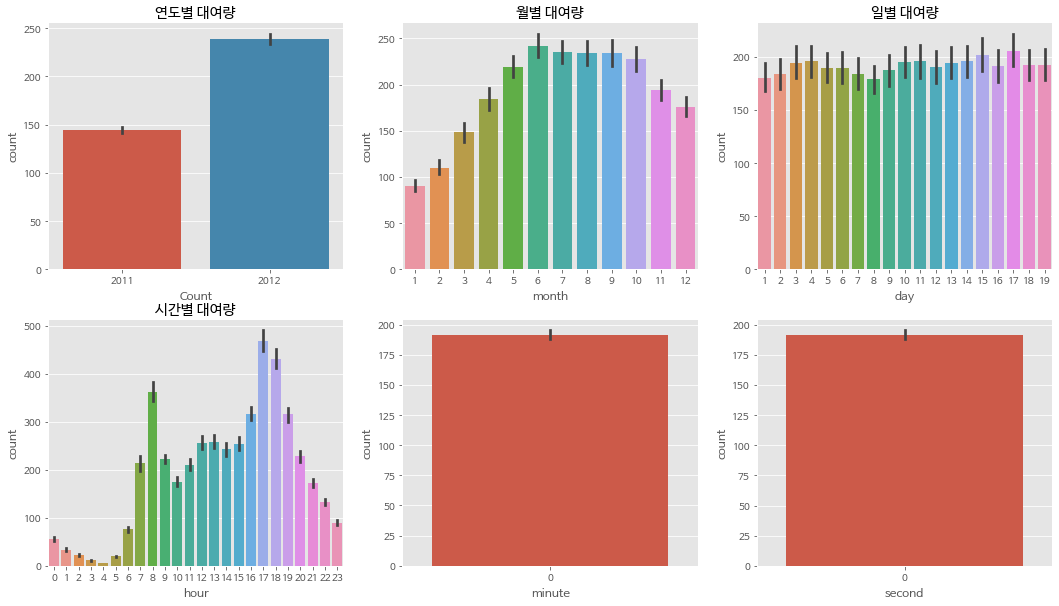

In [ ]:
# 시각화 
figure, ( (ax1, ax2, ax3), (ax4, ax5, ax6) ) = plt.subplots(nrows=2, ncols=3) # ax로 여러개 그래프 지정해 그리기 
figure.set_size_inches(18,10)

# barplot
sns.barplot(data=train, x='year', y='count', ax = ax1) 
sns.barplot(data=train, x='month', y='count', ax= ax2)
sns.barplot(data=train, x='day', y='count', ax= ax3)
sns.barplot(data=train, x='hour', y='count', ax= ax4)
sns.barplot(data=train, x='minute', y='count', ax= ax5)
sns.barplot(data=train, x='second', y='count', ax= ax6)

## set() 을 통해 각 도화지 부분별로 label과 title 한꺼번에 지정 
ax1.set(xlabel='Count', title='연도별 대여량')
ax2.set(xlabel='month', title='월별 대여량')
ax3.set(xlabel='day', title='일별 대여량')
ax4.set(xlabel='hour',title='시간별 대여량')


plt.show()

#### 해석) 일별 대여량은 1일부터 19일까지만 있고 나머지 날짜는 test 셋에 있다. 그래서 이 데이터는 피처로 사용하면 안된다. 
#### 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있을 것 같다. 

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

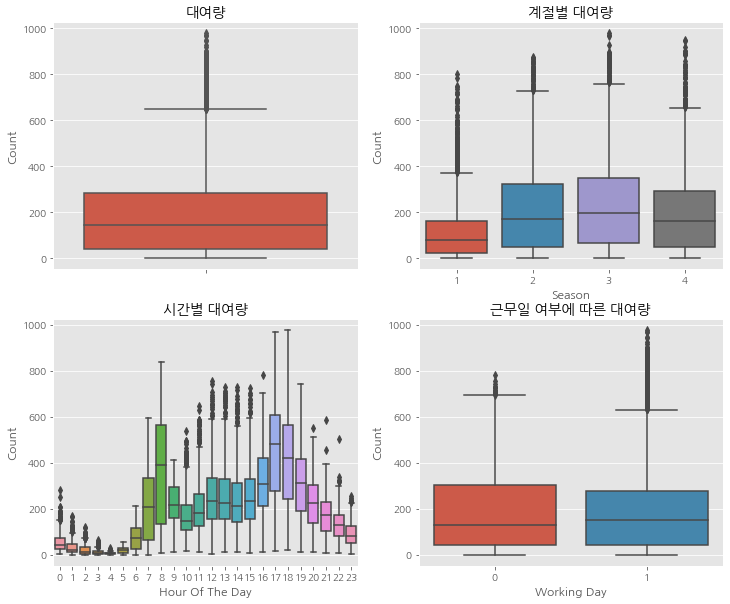

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2) ## axes 로 여러개의 그래프 지정해 그리기 
plt.rc('font', family='NaNumGothic') ## 몇번 많이 돌려야 글씨 제대로 나옴..코랩의 문제?
fig.set_size_inches(12,10)

# boxplot 에 필요한 데이터는 연속형 데이터 
sns.boxplot(data=train, y='count', orient='v', ax = axes[0][0])  ## orient : 수직(v) 방향, 수평(h) 방향 설정 
sns.boxplot(data=train, y='count', x='season', orient='v', ax = axes[0][1])
sns.boxplot(data=train, y='count', x='hour', orient='v', ax = axes[1][0])
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax = axes[1][1])

axes[0][0].set(ylabel='Count',title="대여량")
axes[0][1].set(xlabel='Season', ylabel='Count',title="계절별 대여량")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="시간별 대여량")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="근무일 여부에 따른 대여량")

#### season : 1 = spring, 2 = summer, 3 = fall, 4 = winter
#### 출퇴근 시간에 많이 이용
#### 이상치에 해당하는 대여량이 꽤 존재 

In [ ]:
train["dayofweek"] = train["datetime"].dt.dayofweek # dayofweek : 월~일 을 0~6 숫자로 반환 
train.shape

(10886, 19)

In [ ]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

In [ ]:
train.groupby('hour').mean()[['count']][:9]

,count
hour,
0,55.138462
1,33.859031
2,22.899554
3,11.757506
4,6.407240
5,19.767699
6,76.259341
7,213.116484
8,362.769231


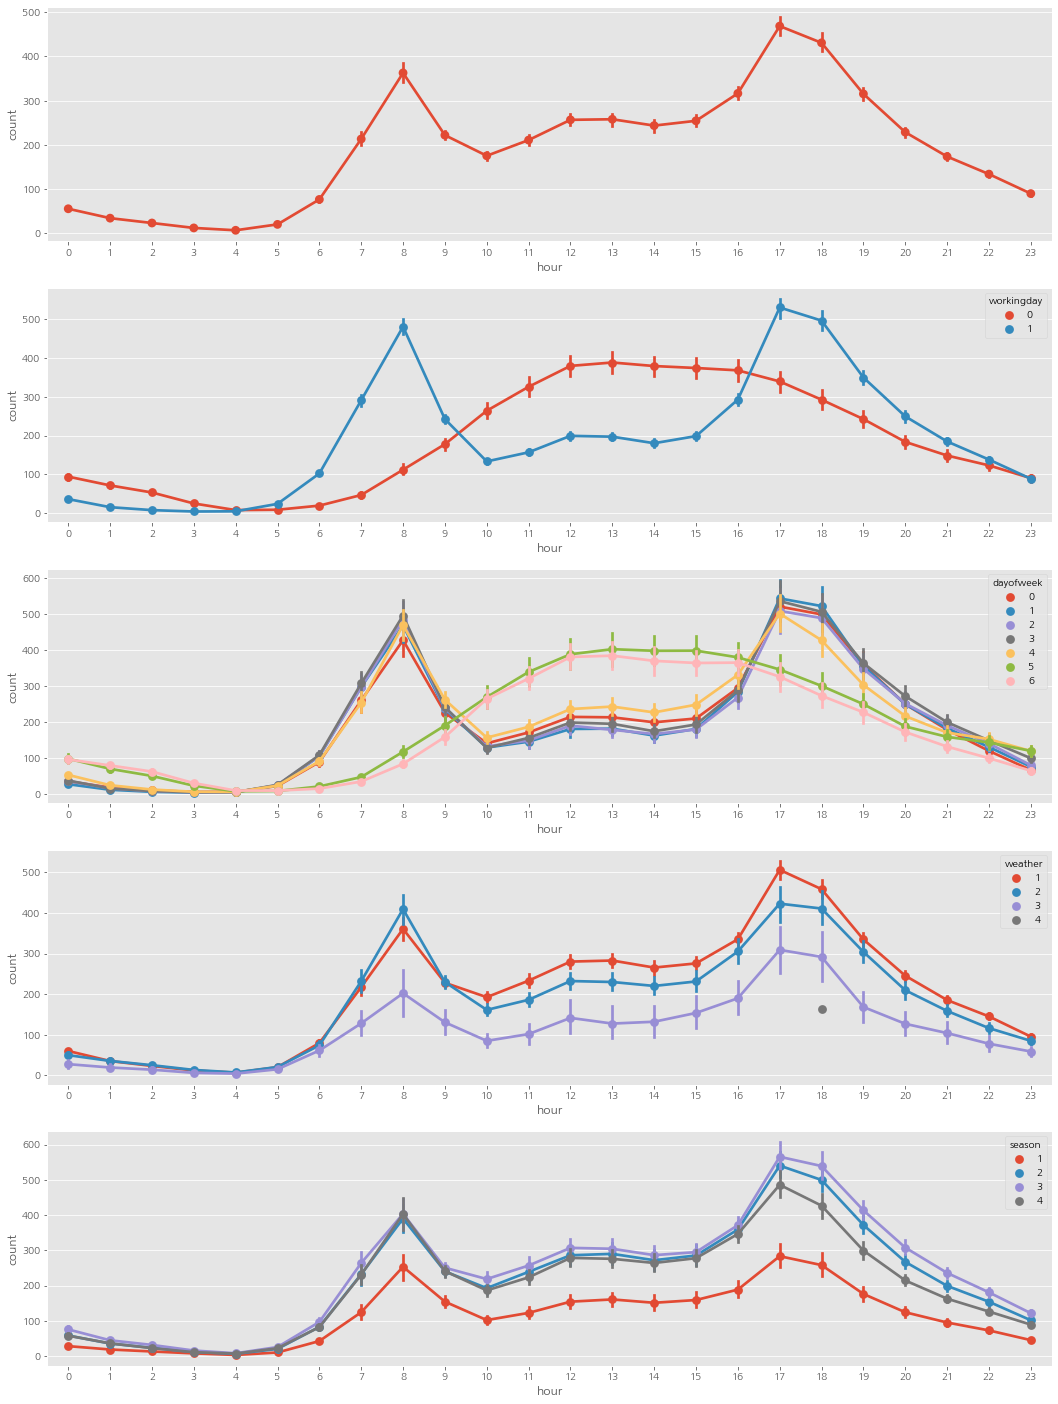

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

# pointplot : 각 수치가 위치한 곳에 점을 찍어 표현 (barplot 과 표현하고자 하는 바는 동일)
sns.pointplot(data=train, x='hour',y='count', ax=ax1)

sns.pointplot(data=train, x='hour',y='count',hue='workingday', ax=ax2)

sns.pointplot(data=train, x='hour',y='count',hue='dayofweek', ax=ax3)

sns.pointplot(data=train, x='hour',y='count',hue='weather', ax=ax4)

sns.pointplot(data=train, x='hour',y='count',hue='season', ax=ax5)

In [ ]:
# 상관관계 살펴보기 
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]] # 수치형 변수들
corrMatt = corrMatt.corr()
print(corrMatt)

# numpy 를 사용해서 mask (그래프에서 대칭의 한쪽 면만 시각화 하도록 하는 부분) 지정 
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False # 아래 삼각형 부분만 표시하는 옵션

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


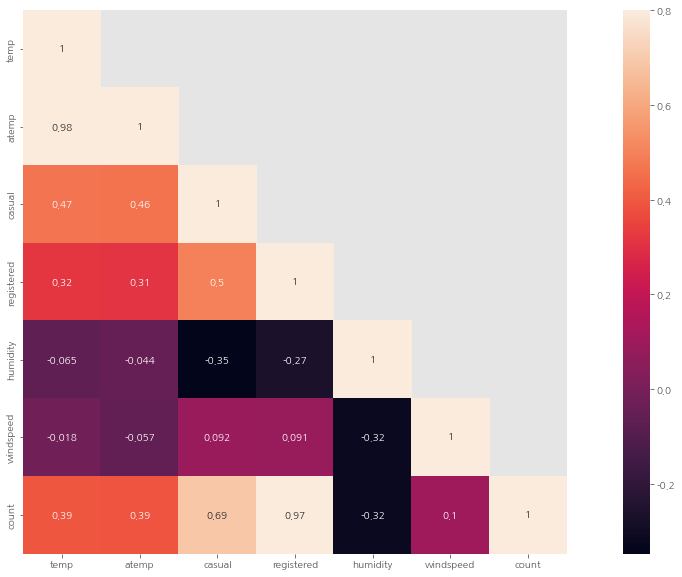

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask = mask, vmax = 0.8 , square=True, annot = True)
# vmax, vmin : 칼러바 범위 
# mask : 표시하지 않을 마스크 부분 지정 
# annot : 실제 값을 표시한다. 
# square : 셀을 정사각형으로 출력하도록 하기 

#### 해석 : count 대여량과 가장 연관이 높은 변수는 registered 로 등록된 대여자이다. 그러나 test 에는 이 값이 없다. 
#### atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처로 사용하기에 적합하지 않을 수 있다.

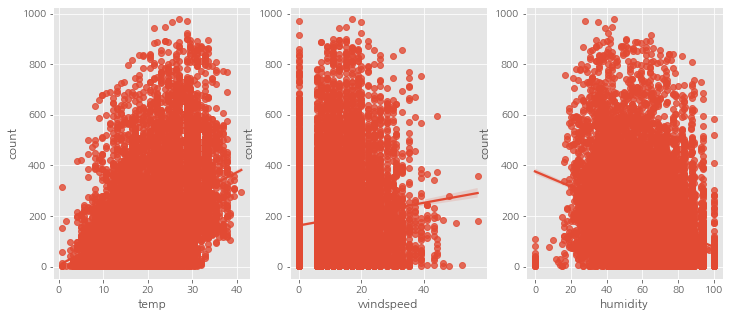

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
# count 와 상관성이 낮은 세개 변수에 대해 regression plot 그려보기

# regplot : 데이터의 분포와, 이 데이터를 선형으로 표현하는 Regression Line을 동시에 표현해주는 그래프
sns.regplot(x='temp', y='count', data = train, ax=ax1)
sns.regplot(x='windspeed', y='count', data = train, ax=ax2)
sns.regplot(x='humidity', y='count', data = train, ax=ax3)

#### windspeed 경우 0에 숫자가 몰려있음 : 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측 

[seaborn plot 더 공부하기](https://rk1993.tistory.com/entry/Pythonseaborn-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-regplot-lmplot-catplot-swarmplot)
* regplot
* Implot : regplot 을 여러개 보고싶을 때
* catplot : 숫자형 변수와 하나 이상의 범주형 변수의 관계를 보여주는 함수 
  * stripplot()
  * swarmplot()
  * boxplot()
  * violinplot()
  * boxenplot()
  * pointplot()
  * barplot()
  * countplot() 

* replot : 두 변수간의 관계를 보여줄 때 사용


In [ ]:
def concate_year_month(datetime) : 
  return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concate_year_month)

train[['datetime','year_month']].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


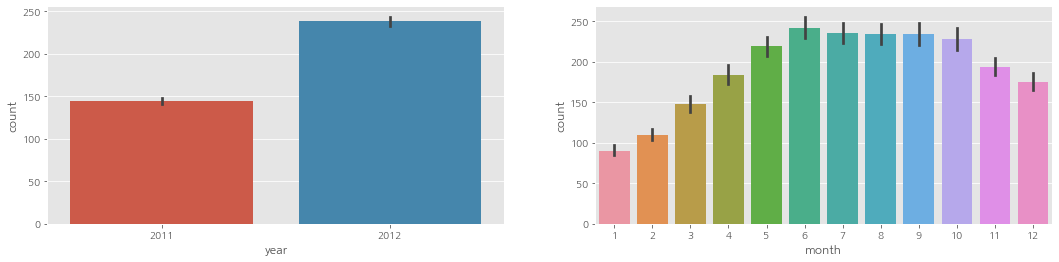

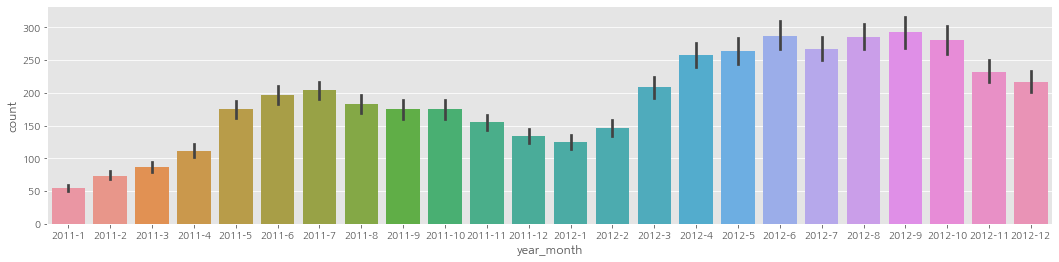

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year', y='count', ax = ax1)
sns.barplot(data=train, x='month', y='count', ax = ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year_month', y='count', ax= ax3)

#### 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세 

In [ ]:
trainWithoutOutliers = train[ np.abs(train['count'] - train['count'].mean()) <= (3*train['count'].std()) ]
# outlier : count값 >= 평균 + 3*표준편차

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


[파이썬 시각화 QQplot](https://blog.naver.com/breezehome50/222339337268)

* QQplot 
  * 두 변수 간의 분포를 비교하기 위해 사용되는 그래프이다. 일반적으로는 **주어진 데이터와 정규분포를 비교하여** 정규분포 가정이 적정한지에 대해 검토하는데 널리 사용된다. 하지만 정규분포에 국한할 필요 없이 두 분포의 비교에 활용할 수 있다. **정규성검증** 

* spicy.stats 를 이용한 QQplot 그리기 
  * ``import scipy.stats as stats``
  * ``stats.probplot(변수, dist = 'norm')``


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.        , 0.        , 0.        , ..., 6.59578051, 6.5971457 ,
         6.59850903])),
 (1.40968461015429, 4.523106928071492, 0.9537631807794262))

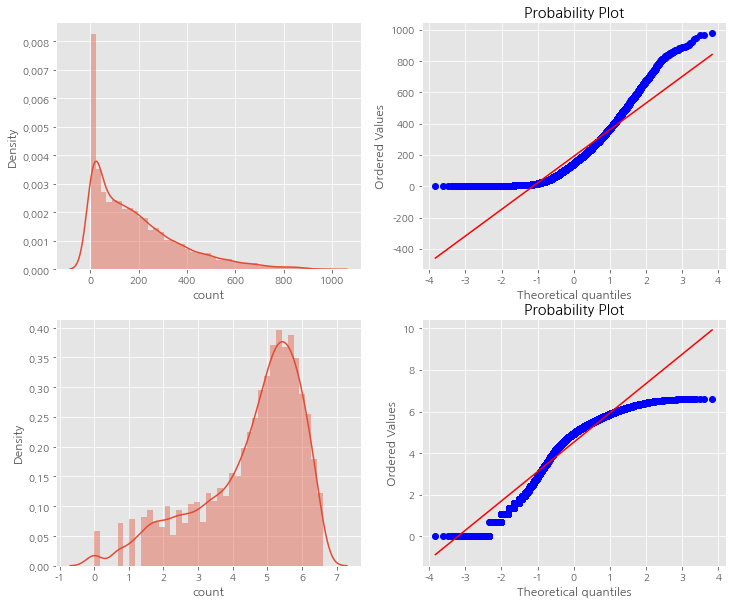

In [ ]:
# count 의 데이터 분포도를 파악 

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,10)

sns.distplot(train['count'], ax = axes[0][0])
stats.probplot(train['count'], dist = 'norm', fit = True , plot = axes[0][1])


sns.distplot( np.log(trainWithoutOutliers['count']) , ax=axes[1][0])
stats.probplot(np.log(trainWithoutOutliers['count']), dist='norm', fit=True, plot=axes[1][1])

### 이상치를 제거한 distplot 에선 오른쪽으로 치우쳐저 있는 분포임을 알 수 있다. 
###  대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다. 
### 대안으로 outlier data를 제거하고 "count"변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만 
### 이전 그래프보다는 좀 더 자세히 표현하고 있다. 


### 사이킷런

**Training**

model ( training data , training labels ) 

```
# 분류기 가져오기 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
```

**Generalization**

prediction ( test data ) 

evaluation ( test labels ) 

```
y_pred = clf.predict(X_test)
clf.score(X_test, y_test) 

```

**캐글 제출 평가 방식 : RMSLE** 

과대평가된 항목 보다는 과소 평가 된 항목에 패널티를 준다. 오차를 제곱해서 평균한 값의 제곱근 값으로 값이 작을수록 정밀도가 높다. 0에 가까운 값이 나올수록 정밀도가 높은 값이다. 


**cross validation**

교차검증. 일반화 성능을 측정하기 위해 데이터를 여러 번 반복해서 나누고 여러 모델을 학습한다. 

### feature engineering & Feature Selection
* null 값 대체 
* 신호와 잡음을 구분해야 한다.
* 피처가 많다고 해서 무조건 좋은 성능을 내지 않는다.
* 피처를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 피처는 제거하도록 한다.

In [4]:
from sklearn.ensemble import RandomForestRegressor
train = pd.read_csv("train.csv", parse_dates=["datetime"]) # datetime 칼럼에 대해 날짜 형식으로 받아오기
test = pd.read_csv("test.csv", parse_dates=["datetime"])

In [5]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 16)

In [6]:
# test 데이터 셋에 대해서도 동일하게 적용 
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 13)

In [7]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5


In [8]:
rfreg = RandomForestRegressor() # 랜덤포레스트 회귀 모델 
f_columns = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'hour', 'dayofweek', 'atemp']
X_train = train[f_columns]
X_train.shape
# 예측 변수 : registered, casual 
y_r_label = train['registered']
y_c_label = train['casual']

In [9]:
X_test = test[f_columns]
X_test.shape

(6493, 9)

In [10]:
rfreg.fit(X_train, y_r_label)

RandomForestRegressor()

In [11]:
test_val = rfreg.predict(X_test)

In [12]:
test['registered'] = test_val
test['registered'].isnull().sum()

0

In [13]:
rfreg.fit(X_train, y_c_label)

RandomForestRegressor()

In [14]:
test_C_val = rfreg.predict(X_test)
test['casual'] = test_C_val 
test['casual'].isnull().sum()

0

**pd.melt**

ID 변수를 기준으로 원래 데이터셋에 있던 여러개의 칼럼 이름을 'variable' 칼럼에 위에서 아래로 길게 쌓아놓고, 'value' 칼럼에 ID와 variable에 해당하는 값을 넣어주는 식으로 데이터를 재구조화

[pandas 공식 사이트 소개](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

![melt](https://t1.daumcdn.net/cfile/tistory/25177F4E5863D58A0C)

In [15]:
hourTransformed = pd.melt(train[['hour','casual','registered']], id_vars = ['hour'], value_vars=['casual', 'registered']) # value_vars : If not specified, uses all columns that are not set as id_vars.
hourTransformed

,hour,variable,value
0,0,casual,3
1,1,casual,8
2,2,casual,5
3,3,casual,3
4,4,casual,0
...,...,...,...
21767,19,registered,329
21768,20,registered,231
21769,21,registered,164
21770,22,registered,117


In [16]:
hourTransformed.groupby(['hour','variable'], sort = True)['value'].mean()

hour  variable  
0     casual         10.312088
      registered     44.826374
1     casual          6.513216
      registered     27.345815
2     casual          4.819196
      registered     18.080357
3     casual          2.681293
      registered      9.076212
4     casual          1.262443
      registered      5.144796
5     casual          1.455752
      registered     18.311947
6     casual          4.149451
      registered     72.109890
7     casual         10.914286
      registered    202.202198
8     casual         21.542857
      registered    341.226374
9     casual         30.956044
      registered    190.824176
10    casual         46.118681
      registered    128.973626
11    casual         60.052747
      registered    150.621978
12    casual         68.831140
      registered    187.677632
13    casual         74.059211
      registered    183.728070
14    casual         76.589912
      registered    166.853070
15    casual         76.028509
      registered    17

In [17]:
hourAggregated = pd.DataFrame(hourTransformed.groupby(['hour','variable'], sort = True)['value'].mean()).reset_index()

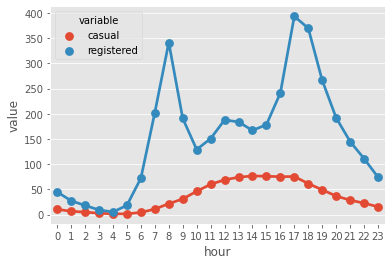

In [21]:
sns.pointplot(x=hourAggregated['hour'], y = hourAggregated['value'], hue = hourAggregated['variable'], hue_order = ['casual','registered'], data = hourAggregated )
# pointplot : 각 수치가 위치한 곳에 점을 찍어서 표현, 점끼리 이어서 라인을 그림

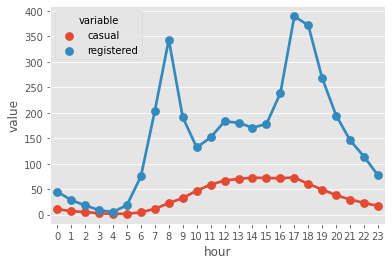

In [22]:
hourTransformed = pd.melt(test[['hour','casual','registered']], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(['hour','variable'],sort=True)['value'].mean()).reset_index()
sns.pointplot(x=hourAggregated['hour'], y=hourAggregated['value'],hue=hourAggregated['variable'],hue_order=['casual','registered'], data=hourAggregated)

**데이터프레임 결합**

[참고](https://ordo.tistory.com/51)

* conacat, append
* append 는 세로 방향으로만 결합됨 

In [23]:
# train, test 데이터셋 합치기
data = train.append(test)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

In [24]:
# 풍속이 0인 데이터의 값들을 보정해준다. 
data[data['windspeed']==0].shape

(2180, 16)

In [25]:
# 머신러닝으로 예측을 해서 풍속이 0인 값을 대체한다. 
dataWind0 = data[data['windspeed']==0]
dataWindNot0 = data[data['windspeed']!=0]
rfmodel_wind = RandomForestRegressor()
windColumns = ['season','weather','humidity','month','temp','year','atemp']
rfmodel_wind.fit(dataWindNot0[windColumns], dataWindNot0['windspeed'])

wind0Values = rfmodel_wind.predict(X=dataWind0[windColumns])
dataWind0['windspeed'] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)


In [26]:
data[data['windspeed']==0].shape

(0, 16)

In [27]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp = True) : 

  if convertExp : 
    predicted_values = np.exp(predicted_values)
    actual_values = np.exp(actual_values)
  
  # 넘파이 배열 형태로 바꿔주기 
  predicted_values = np.array(predicted_values)
  actual_values = np.array(actual_values)

  # 예측값과 실제값에 1을 더하고 로그 씌우기
  log_predict = np.log(predicted_values +1)
  log_actual = np.log(actual_values + 1)

  # 위에서 계산한 예측값에 실제값을 빼주고 제곱을 해준다. <요기가 포인트!>
  difference = log_predict - log_actual
  difference = np.square(difference)

  # 평균 내기 
  mean_difference = difference.mean()

  # 다시 루트 씌우기
  score = np.sqrt(mean_difference)

  return score 

In [28]:
categoricalFeatureNames = ['season','holiday','workingday','weather','dayofweek','year','hour'] # 범주형 변수
numericalFeatureNames = ['temp','humidity','windspeed','atemp','casual','registered'] # 수치형 변수
dropFeatures = ['count','datetime','month'] # 삭제할 변수 : 예측변수, datetime, month 

**astype('category')**
카테고리형으로 변환 

In [29]:
for var in categoricalFeatureNames : 
  data[var] = data[var].astype('category') 

In [30]:
# count (예측변수) 가 null 인 값은 제외한 데이터를 대상으로 날짜 순으로 정렬한 데이터셋 
X_train = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
X_test = data[~pd.notnull(data['count'])].sort_values(by=['datetime']) # 왜 test 셋은 ~ notnull
datetimecol = X_test['datetime']
y_train = X_train['count']

In [31]:
X_train  = X_train.drop(dropFeatures,axis=1)
X_test  = X_test.drop(dropFeatures,axis=1)

**RandmForestRegressor**
n_estimator = 트리의 수

max_depth = 트리의 깊이

max_features = 나누는 수 

 

n_estimator 는 클 수록 좋다! 트리를 많이 만들어 볼수록 좋다. (경우의 수가 많아진다.)

max_features 는 각 트리의 무작위를 얼마나 할 것인지 결정한다.

 

작은 max_features와 큰 n_estimator 는 과대 적합을 줄인다는 장점이 있다. 

랜덤 포레스트 모델을 쓸 때는 n_estimator 인자와 max_features인자를 조절하며

결정계수가 가장 높아지는 인자를 사용하는 것이 좋다. 

In [32]:
rfmodel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)

rfmodel.fit(X_train, y_train_log)

RandomForestRegressor()

In [33]:
preds = rfmodel.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print('RMSLE Value For Random Forest : ', score)

RMSLE Value For Random Forest :  0.005321349277511917


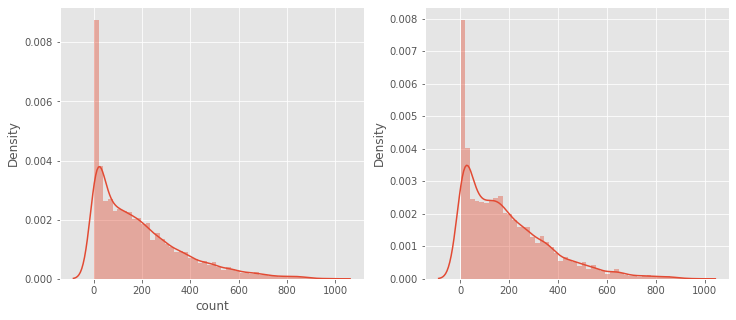

In [34]:
predsTest = rfmodel.predict(X_test)
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train, ax=ax1, bins=50)
sns.distplot(np.exp(predsTest), ax=ax2 , bins=50)
# train 데이터와 test 데이터의 count 의 경향이 비슷함 

### 다양한 모델 사용해 상위 5%이내 점수 얻기 


**데이터 로드 및 칼럼 추가**

In [40]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
test = pd.read_csv("test.csv", parse_dates=["datetime"])

In [42]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 16)

In [43]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5


In [44]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 13)

**범주형 변수 처리**

[판다스 - 카테고리 자료형](https://steadiness-193.tistory.com/233)

* category 형식
  * 문자열 객체를 범주형으로 변경 : 개별 오브젝트들이 순서(또는 레벨)을 가질 수 있는 형식이 된다. 
  * 문자열 변수를 카테코리형 변수로 변환하면 메모리가 절약된다. 

![category](https://blog.kakaocdn.net/dn/bXXXO1/btqGVwrNI7u/CiISkQyf7UrGrIlAHZP1m1/img.png)

* categorical 객체는 categories와 codes 속성을 가진다.
![1](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdiREEd%2FbtqGU0zqWS9%2FCdHcFMZ9jYfhzlHyfHbS51%2Fimg.png) 

* 보통 범주형 변수에 대해서 원핫인코딩 작업을 하는데, 여기선 원핫 인코딩을 해도 성능이 크게 좋아지진 않아서 그냥 pass 함

In [45]:
# 범주형 feature 의 타입을 category 로 변경한다. 
categorical_feature_names = ['season', 'holiday', 'workingday', 'weather', 'dayofweek', 'month', 'year', 'hour']

for var in categorical_feature_names : 
  train[var] = train[var].astype('category')
  test[var] = test[var].astype('category')

**train / test set 만들기 : X, y**

In [46]:
feature_names = ["season", "weather", "temp", "atemp", "humidity",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

X_train = train[feature_names]
X_test = train[feature_names]

label_name = 'count'
y_train = train[label_name]

#### 선형회귀모델
* 선형회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘
* 선형회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(MSE)를 최소화하는 파라미터 w와 b를 찾는다.
* 모델 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 수 없다는 단점이 있다.


In [47]:
from sklearn.linear_model import LinearRegression , Ridge, Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [48]:
linear = LinearRegression() 
y_train_log = np.log1p(y_train) # log 단위 변경 : 1을 더하고 로그를 취함 -> 로그변환 : 데이터를 정규분포에 가깝게 되도록 변환해주기 위함
linear.fit(X_train, y_train_log) # 훈련
preds = linear.predict(X_train) # 예측 
print('RMSE : ', rmsle(np.exp(y_train_log), np.exp(preds), False)) # 위에서 정의했던 rmsle 함수 적용해 정확도 평가

RMSE :  0.9803697923313522


**[정규화](https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0)**
* 오버피팅을 줄이는 방법은 첫째, 특성의 개수를 줄인다. 둘째, 정규화를 수행한다. 
* 정규화는 모든 특성을 사용하되, 파라미터 값(베타값)을 줄인다. 
* 이런 정규화 컨셉을 회귀에 도입한게 릿지와 라쏘

![2](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcGtn12%2FbtqDn1Oq3Ou%2FaJNYgKQKgGlGikMghdlyXK%2Fimg.png)

* (2) 가 패널티항으로, 람다가 클수록 회귀 계수 추정치는 0에 가까워 진다. 제곱형태라 미분이 가능해 Gradient Descent 최적화가 가능하고, 파라미터의 크기가 작은 것보다 큰 것을 더 빠른 속도로 줄여준다. 

* 이러한 방법이 어떻게 '일반화' 를 부여해 과적합을 방지하는 것인가 
  * [설명](https://otugi.tistory.com/127) 
  * 가중치들이 0이 되게 함(혹은 가까워지게 함)으로써 그에 해당하는 특성들을 제외하는데, 결과적으로 모델에서 가장 중요한 특성이 무엇인지 알게되는 등 **모델 해석력**이 좋아진다. 




**GridsearchCV**

* 사이킷런에서는 분류 알고리즘이나 회귀 알고리즘에 사용되는 하이퍼파라미터를 순차적으로 입력해 학습을 하고 측정을 하면서 가장 좋은 파라미터를 알려준다. 

- estimator : classifier, regressor, pipeline 등 가능

- param_grid : 튜닝을 위해 파라미터, 사용될 파라미터를 **dictionary 형태**로 만들어서 넣는다.

- scoring : 예측 성능을 측정할 평가 방법을 넣는다. 보통 accuracy 로 지정하여서 정확도로 성능 평가를 한다.

- cv : 교차 검증에서 몇개로 분할되는지 지정한다.

- refit : True가 디폴트로 True로 하면 최적의 하이퍼 파라미터를 찾아서 재학습 시킨다.

- 결과는 ``cv_results_`` 에 저장된다.  결과에서 rank_test_score가 성능의 순위를 나타낸다. 

[from sklearn.metrics import make_scorer](https://wooono.tistory.com/204) : custom scoring 함수 


#### 릿지
* 회귀를 위한 선형모델
* 가중치(w) 의 모든 원소가 0에 가깝게 만들어, 모든 피처가 주는 영향을 최소화 (기울기를 작게 만듦) 
* 정규화 (regularization) 는 오버피팅이 되지 않도록 모델을 강제로 제한한다는 의미 
* max_iter(반복 실행 횟수)는 3000을 넣어준다. 

In [49]:
from joblib import parallel
ridge_m = Ridge()
ridge_params_ = {'max_iter' : [3000], 'alpha' : [0.01, 0.1 , 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False) # False 는 score 값이 낮은게 좋음을 의미 
grid_ridge_m = GridSearchCV(ridge_m, ridge_params_ , scoring = rmsle_scorer, cv = 5)

y_train_log = np.log1p(y_train)
grid_ridge_m.fit(X_train, y_train_log)
print(grid_ridge_m.best_params_)

preds = grid_ridge_m.predict(X_train)
print('RMSLE : ' , rmsle(np.exp(y_train_log), np.exp(preds), False))

df = pd.DataFrame(grid_ridge_m.cv_results_)
df.head()

{'alpha': 0.01, 'max_iter': 3000}
RMSLE :  0.9803697902780834


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031411,0.004208,0.012741,0.003391,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-1.003138,-0.906726,-1.029928,-1.016631,-0.982313,-0.987747,0.043461,1
1,0.025467,0.007611,0.012085,0.006446,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-1.003140,-0.906726,-1.029928,-1.016630,-0.982315,-0.987748,0.043461,2
2,0.022634,0.013881,0.009122,0.003403,1,3000,"{'alpha': 1, 'max_iter': 3000}",-1.003167,-0.906727,-1.029927,-1.016621,-0.982331,-0.987755,0.043461,3
3,0.019895,0.003175,0.008954,0.002950,2,3000,"{'alpha': 2, 'max_iter': 3000}",-1.003196,-0.906728,-1.029926,-1.016612,-0.982349,-0.987762,0.043461,4
4,0.016992,0.007139,0.008578,0.002801,3,3000,"{'alpha': 3, 'max_iter': 3000}",-1.003226,-0.906729,-1.029925,-1.016602,-0.982366,-0.987770,0.043460,5


In [50]:
df['alpha'] = df['params'].apply(lambda x : x['alpha']) 
# params 칼럼은 dict 형식으로 alpha 값이 저장되어 있으므로 apply 함수로 접근해 값을 가져온다
df['rmsle'] = df['mean_test_score'].apply(lambda x : -x) # rmsle 는 값이 작을수록 좋음 
df[['alpha', 'rmsle']].head()

,alpha,rmsle
0,0.01,0.987747
1,0.10,0.987748
2,1.00,0.987755
3,2.00,0.987762
4,3.00,0.987770


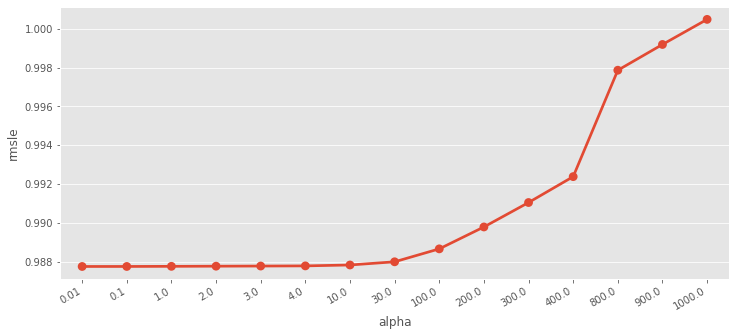

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha = 'right')
sns.pointplot(data=df, x = 'alpha', y='rmsle', ax=ax)

#### 라쏘
* 선형회귀의 Regularization(규제)를 적용하는 대안
* 계수를 0에 가깝게 만들려고 하며 이를 L1규제라고 하며, 어떤 계수는 0이 되기도 하는데 이는 완전히 제외하는 피처가 생긴다는 의미다.
* 피처 선택이 자동으로 이루어진다고도 볼 수 있다.
* alpha 값의 기본 값은 1.0이며, 과소 적합을 줄이기 위해서는 이 값을 줄여야 한다.
* 그리드 서치로 아래 라쏘모델을 실행했을 때 베스트 알파값은 0.0025
* max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.

In [52]:
lasso_m_ = Lasso()
alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = {'max_iter' : [3000], 'alpha' : alpha}

grid_lasso_m = GridSearchCV(lasso_m_, lasso_params_ , scoring = rmsle_scorer, cv = 5)
y_train_log = np.log1p(y_train)
grid_lasso_m.fit(X_train, y_train_log)
print(grid_lasso_m.best_params_)

preds = grid_lasso_m.predict(X_train)
print('RMSLE : ', rmsle(np.exp(y_train_log), np.exp(preds), False))

df = pd.DataFrame(grid_lasso_m.cv_results_)
df['alpha'] = df['params'].apply(lambda x : x['alpha'])
df['rmsle'] = df['mean_test_score'].apply(lambda x : -x)

df[['alpha', 'rmsle']].head()


{'alpha': 0.00125, 'max_iter': 3000}
RMSLE :  0.9803727821457648


,alpha,rmsle
0,10.000000,1.397124
1,1.000000,1.071947
2,0.500000,1.062110
3,0.333333,1.060815
4,0.250000,1.061139


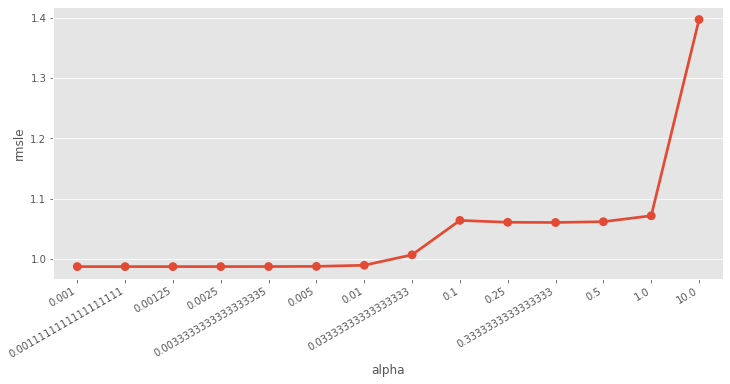

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data = df, x='alpha', y = 'rmsle', ax=ax)

#### 앙상블 모델 - 랜덤 포레스트 (배깅)

In [55]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators = 100) 

y_train_log = np.log1p(y_train)
rf.fit(X_train, y_train_log)

preds = rf.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print("RMSLE : ", score)

RMSLE :  0.10784362717138182


#### 앙상블 모델 - 그래디언트 부스트 (부스팅)
* 여러개의 결정트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법 
* 회귀와 분류에 모두 사용할 수 있음 
* 랜덤포레스트와 달리 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다. 
* 무작위성이 없고 강력한 사전 가지치기가 사용됨 
* 1~5개의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측이 빠름 
* learning_rate : 오차를 얼마나 강하게 보정할 것인지를 제어
* n_estimator의 값을 키우면 앙상블에 트리가 더 많이 추가 되어 모델의 복잡도가 커지고 훈련세트에서의 실수를 바로잡을 기회가 많아지지만 너무 크면 모델이 복잡해지고 오버피팅(과대적합)이 될 수있다
* max_depth(max_leaf_nodes) 복잡도를 너무 높이지 말고 트리의 깊이가 5보다 깊어지지 않게 한다.

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators = 4000, alpha = 0.01)

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print('RMSLE : ', score)

RMSLE :  0.21357403727840332


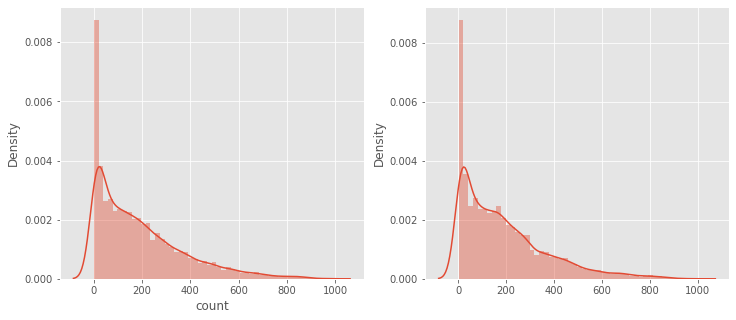

In [59]:
predsTest = gbm.predict(X_test)
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train, ax = ax1, bins = 50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)